In [1]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import json
import mixamo_helper as mm_helper
from multiprocessing import Process, Pool
import glob
# https://stackoverflow.com/questions/9401658/how-to-animate-a-scatter-plot

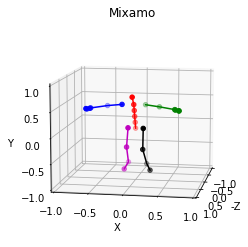

In [2]:

jsonobject = None
with open("output/mixamo_T_pose.gif.json_mixamo.json") as f:
    jsonobject = json.load(f)
mm_helper.draw_mixamo(jsonobject, 0)

## **Read mixamo json**

In [3]:
my_pool = Pool()

target_pattern = r"output/*.json"
file_list = glob.glob(target_pattern)
file_list = [file.replace('\\', '/') for file in file_list]
for file in file_list:
    json_object = None
    with open(file) as f:
        json_object = json.load(f)
    my_pool.apply_async(mm_helper.json_to_gif, (json_object, './screenshot'))
    my_pool.apply_async(mm_helper.json_to_gif, (json_object, './screenshot', 100 , True))
    my_pool.apply_async(mm_helper.json_one_frame_to_360_gif, (json_object, 0,'./screenshot'))

my_pool.close()
my_pool.join()